In [1]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

df.drop_duplicates()
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

In [2]:
df_og = df.copy()

df_da = df[df['job_title_short'] == 'Data Analyst'].copy()

df_da.dropna(subset = ['job_skills', 'salary_year_avg'], inplace = True)

import ast
df_da['job_skills'] = df_da['job_skills'].apply(lambda sk : ast.literal_eval(sk) if pd.notna(sk) else sk)

df_da_ex = df_da.explode("job_skills")

df_da_plot = df_da_ex.groupby(by = "job_skills").agg(
    median_salary = ('salary_year_avg', "median"),
    demand = ('job_skills', "size")
    )

# svn skill is outlier in the highest job pay so I am going to remove it from my analysis.
df_da_pay = df_da_plot.sort_values(by = "median_salary", ascending = False).drop("svn").head(10)
df_da_demand = df_da_plot.sort_values(by = "demand", ascending = False).head(10).sort_values(by = "median_salary", ascending = False)


In [3]:
# MATPLOTLIB style :

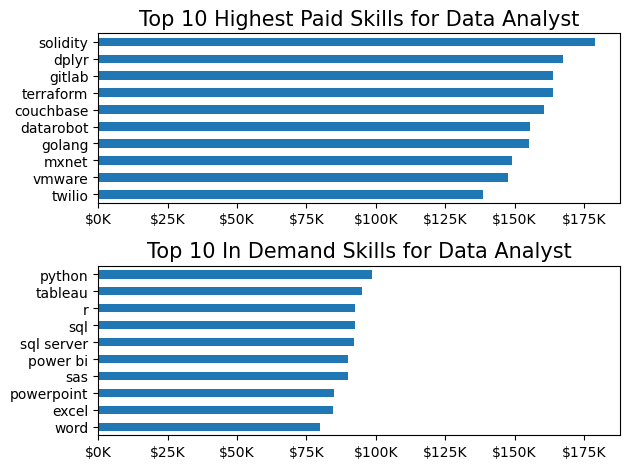

In [4]:
fig, ax = plt.subplots(2, 1)

df_da_pay['median_salary'].plot(kind = 'barh', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Top 10 Highest Paid Skills for Data Analyst", fontsize = 15)
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))

df_da_demand['median_salary'].plot(kind = 'barh', ax = ax[1])
ax[1].invert_yaxis()
ax[1].set_title("Top 10 In Demand Skills for Data Analyst", fontsize = 15)
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

In [5]:
# SEABORN Style :

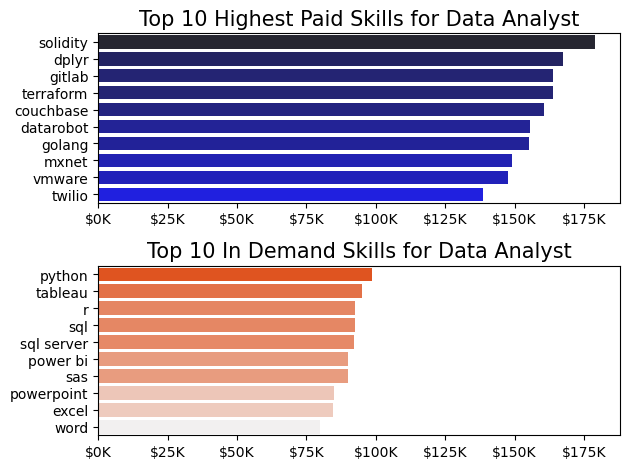

In [6]:
fig, ax = plt.subplots(2, 1)

sns.barplot(data = df_da_pay
            , x = 'median_salary'
            , y = df_da_pay.index
            , ax = ax[0]
            , hue = "median_salary"
            , palette = "dark:#0000FF_r")
ax[0].set_title("Top 10 Highest Paid Skills for Data Analyst", fontsize = 15)
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
ax[0].legend().remove()

sns.barplot(data = df_da_demand
            , x = 'median_salary'
            , y = df_da_demand.index
            , ax = ax[1]
            , hue = "median_salary"
            , palette = "light:#FF4500")
ax[1].set_title("Top 10 In Demand Skills for Data Analyst", fontsize = 15)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
ax[1].legend().remove()

fig.tight_layout()

In [7]:
# You can refer this docx for more info regarding color and color palettes :
# https://seaborn.pydata.org/tutorial/color_palettes.html

# Moreover, there is a pattern for mentioning palette i.e. intensity:+HEX Code+_r
# intensity: : It refers to the hue nature whether you want it dark or light 
#              That means if you choose dark the hue will follow medium intensity to dark one
#              and if you choose light then the hue will follow medium intensity to light one
# HEX Code : It refers to the hex rgb code of the color to which you want to fill the plot.
# _r : It reverse the hue pattern

# So if I want the dark intensity of blue color in reverse hue pattern then : palette = dark:#0000FF_r

# Moreover, If you talking perticularly about red, blue and green color we can also use "r", "b", "g" respectively instead of their hex code
# So, above code can be also written as palette = dark:b_r

In [8]:
# There are differents themes for charts using sns.set_theme(). Here's the docx : 
# https://seaborn.pydata.org/generated/seaborn.set_theme.html

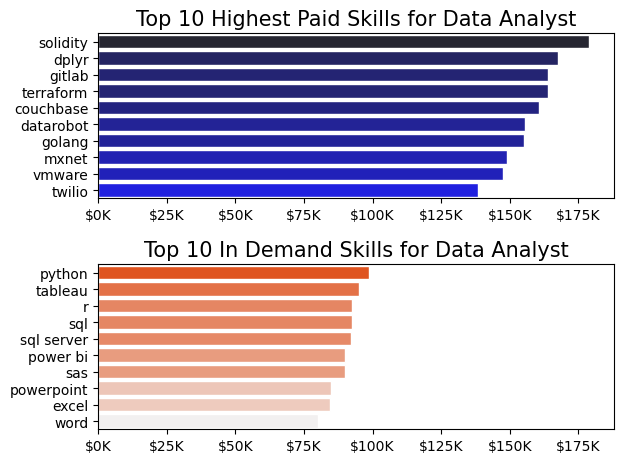

In [9]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style = 'ticks')
sns.barplot(data = df_da_pay
            , x = 'median_salary'
            , y = df_da_pay.index
            , ax = ax[0]
            , hue = "median_salary"
            , palette = "dark:#0000FF_r")
ax[0].set_title("Top 10 Highest Paid Skills for Data Analyst", fontsize = 15)
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
ax[0].legend().remove()

sns.barplot(data = df_da_demand
            , x = 'median_salary'
            , y = df_da_demand.index
            , ax = ax[1]
            , hue = "median_salary"
            , palette = "light:#FF4500")
ax[1].set_title("Top 10 In Demand Skills for Data Analyst", fontsize = 15)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
ax[1].legend().remove()

fig.tight_layout()

In [ ]:
# Matplotlib way of plotting distributions :

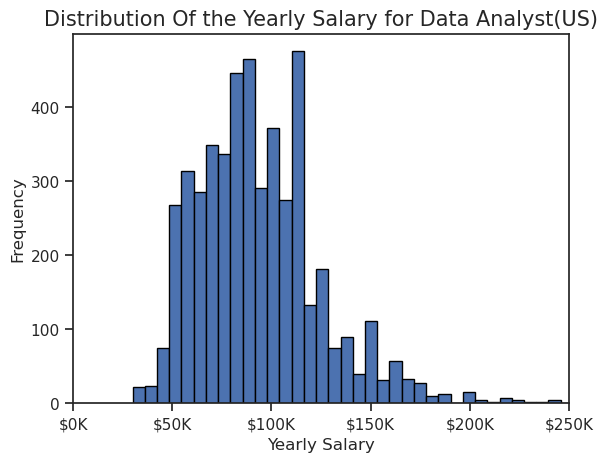

In [14]:
df_da.salary_year_avg.plot(kind = "hist", bins = 60, edgecolor = "black")
plt.xlim(0,250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
plt.title("Distribution Of the Yearly Salary for Data Analyst(US)", fontsize = 15)
plt.xlabel("Yearly Salary")
plt.show()

In [15]:
# Seaborn way of plotting distributions :

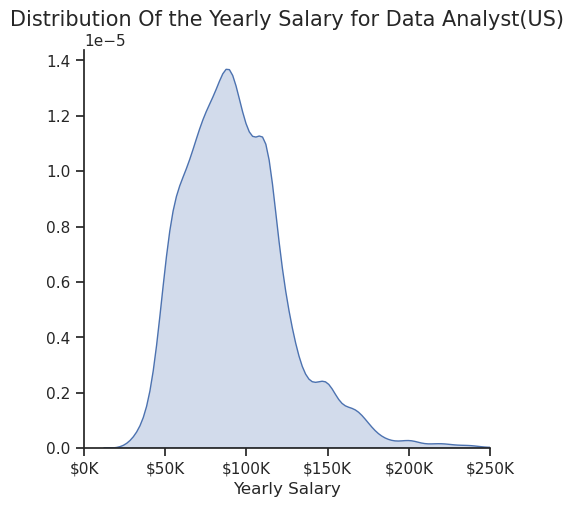

In [20]:
sns.displot(data = df_da.salary_year_avg, fill = True, kind = "kde")
plt.xlim(0,250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
plt.title("Distribution Of the Yearly Salary for Data Analyst(US)", fontsize = 15)
plt.xlabel("Yearly Salary")
plt.ylabel("")
plt.show()

In [ ]:
# sns.displot() docx :
# https://seaborn.pydata.org/generated/seaborn.displot.html